# Exploring Support Vector Machines for diabetes Dataset




In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

## Data

The data shown here simulates a medical study in which group of researcher analysed whether a person had diabetes based on the given features



In [ ]:
pf = pd.read_csv("/content/Diabetes_data.csv")

In [ ]:
pf.head()

,BloodPressure,Glucose,Outcome
0,72,148,1
1,66,85,0
2,64,183,1
3,66,89,0
4,40,137,1


##Data preprocessing

In [ ]:
# Checking whether there is any null values
pf.isnull().sum()

BloodPressure    0
Glucose          0
Outcome          0
dtype: int64

In [ ]:
y = np.array(pf['Outcome'])
X = pf.drop('Outcome',axis=1)

In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

There are no null values

## Classes

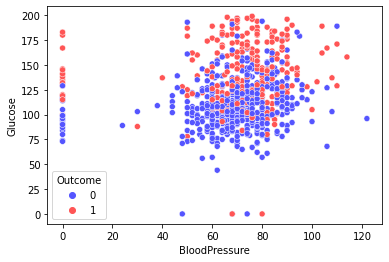

In [ ]:
# visualising different classes i.e. the viruses present 
sns.scatterplot(x='BloodPressure',y='Glucose',hue='Outcome',
                data=pf,palette='seismic')

## Separating Hyperplane

Our goal with SVM is to create the best separating hyperplane. In 2 dimensions, this is simply a line.

In [ ]:
# Defining a function to draw SVM boundaries
def plot_svm_boundary(model,X,y):
    
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

## SVM - Support Vector Machine

In [ ]:
#importing SVM classifier from sklearn library
from sklearn.svm import SVC # Support Vector Classifier

In [ ]:
# defining the SVM model with a linear kernel
# We will deal with the hyperparameters later
model = SVC(kernel='linear', C=100)
model.fit(X_train, y_train)

SVC(C=100, kernel='linear')

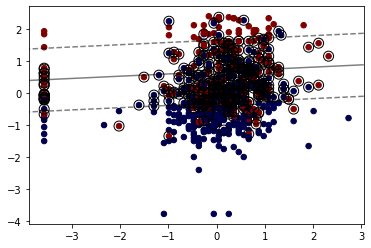

In [ ]:
plot_svm_boundary(model,X_train,y_train)

Linear Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7532467532467533


## Hyper Parameters

### C

Regularization parameter. 

In [ ]:
model = SVC(kernel='linear', C=0.05)
model.fit(X_train, y_train)

SVC(C=0.05, kernel='linear')

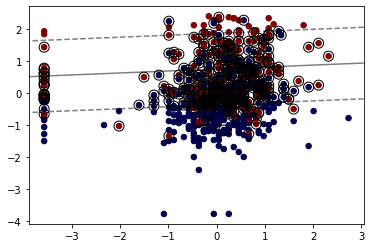

In [ ]:
plot_svm_boundary(model,X_train, y_train)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(kernel='linear',C=0.05)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7597402597402597


### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

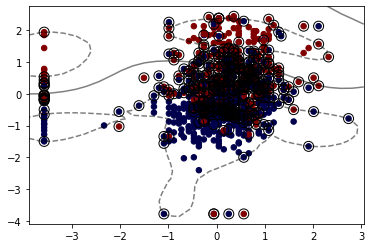

In [ ]:
model = SVC(kernel='rbf', C=1)
model.fit(X_train, y_train)
plot_svm_boundary(model,X_train, y_train)

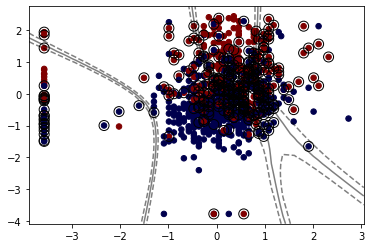

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)
plot_svm_boundary(model,X_train, y_train)

Default rbf

In [ ]:
svc=SVC(kernel='rbf',C=1)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7792207792207793


#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

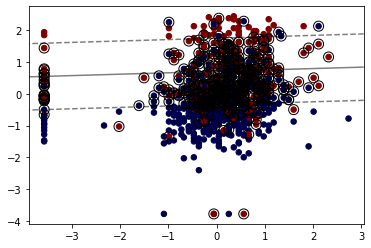

In [ ]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X_train, y_train)
plot_svm_boundary(model,X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


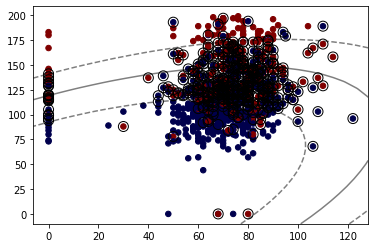

In [ ]:
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X_train, y_train)
plot_svm_boundary(model,X_train, y_train)

Default polynomial

In [ ]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7662337662337663


### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

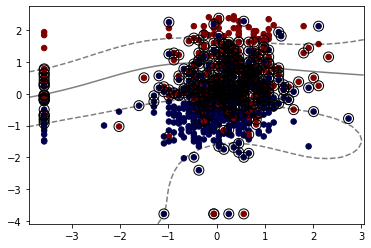

In [ ]:
model = SVC(kernel='rbf', C=1,gamma=0.1)
model.fit(X_train, y_train)
plot_svm_boundary(model,X_train, y_train)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(kernel='rbf', C=1,gamma=0.1)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7727272727272727
